In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import networkx as nx
from IPython.display import display

# Load the dataset
file_path = "/content/cancer.csv"
df = pd.read_csv(file_path)

In [ ]:
display(df.head())

,County,FIPS,2023 Rural-Urban Continuum Codes([rural urban note]),"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,"Union County, Florida(6)",12125.0,Rural,1248.4,1177.5,1322.7,N/A,N/A,N/A,245,stable,0.4,-0.6,1.5
1,"Traverse County, Minnesota(6)",27155.0,Rural,693.5,588.2,814.3,N/A,N/A,N/A,37,stable,2.2,-0.9,5.5
2,"Polk County, Texas(7)",48373.0,Rural,679.5,648.4,711.8,N/A,N/A,N/A,436,stable,-0.3,-3.1,2.5
3,"Galax City, Virginia(6)",51640.0,Rural,655,577.7,740.2,N/A,N/A,N/A,55,stable,1.7,-0.7,4
4,"Greeley County, Nebraska(6)",31077.0,Rural,653.1,519.4,812.5,N/A,N/A,N/A,21,stable,0.7,-2.3,3.6


In [ ]:
# Handling missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values[missing_values > 0])

Missing Values per Column:
 County                                                          11
FIPS                                                            35
2023 Rural-Urban Continuum Codes([rural urban note])            35
Age-Adjusted Incidence Rate([rate note]) - cases per 100,000    35
Lower 95% Confidence Interval                                   35
Upper 95% Confidence Interval                                   35
CI*Rank([rank note])                                            35
Lower CI (CI*Rank)                                              35
Upper CI (CI*Rank)                                              35
Average Annual Count                                            35
Recent Trend                                                    35
Recent 5-Year Trend ([trend note]) in Incidence Rates           35
Lower 95% Confidence Interval.1                                 35
Upper 95% Confidence Interval.1                                 35
dtype: int64


In [ ]:
# Convert numerical columns to correct types
numerical_cols = [ 'FIPS','Age-Adjusted Incidence Rate([rate note]) - cases per 100,000',
                  'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
                  'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1','Recent 5-Year Trend ([trend note]) in Incidence Rates']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Drop rows with too many missing values (threshold 20%)
df.dropna(thresh=len(df.columns) * 0.8, inplace=True)

# Drop non-numeric columns for correlation analysis
df_numeric = df.select_dtypes(include=[np.number])


Missing Values: Several fields have missing or "N/A" values, particularly in CI Rankings.

Data Types: Most numeric fields are stored as objects (strings) instead of numerical types, requiring conversion.

,Top 10 Highest Counties,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Top 10 Lowest Counties,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"
0,"Union County, Florida(6)",1248.4,"Hinsdale County, Colorado(6)",182.3
1,"Traverse County, Minnesota(6)",693.5,"Mineral County, Colorado(6)",207.4
2,"Polk County, Texas(7)",679.5,"Jeff Davis County, Texas(7)",208.0
3,"Galax City, Virginia(6)",655.0,"Oliver County, North Dakota(6)",219.0
4,"Greeley County, Nebraska(6)",653.1,"Keweenaw County, Michigan(6)",220.9
5,"Dewey County, South Dakota(6)",634.5,"Gilliam County, Oregon(6)",226.4
6,"Quitman County, Mississippi(6)",626.5,"Cimarron County, Oklahoma(6)",239.6
7,"Wheatland County, Montana(6)",626.0,"Sierra County, California(7)",259.6
8,"Faulk County, South Dakota(6)",625.3,"Whitman County, Washington(6)",262.9
9,"Stonewall County, Texas(7)",621.1,"Scott County, Virginia(6)",262.9


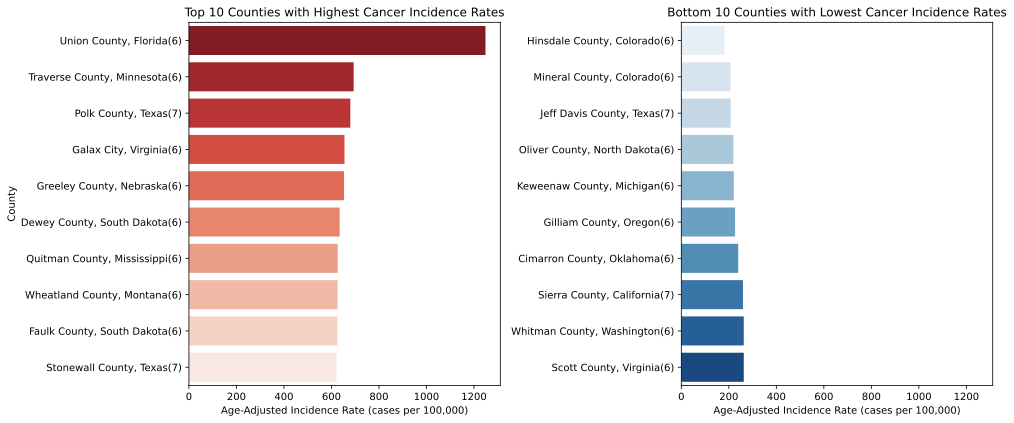

In [ ]:
# Identify Counties with Highest and Lowest Cancer Incidence Rates
top_10 = df.nlargest(10, 'Age-Adjusted Incidence Rate([rate note]) - cases per 100,000')[["County", "Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"]]
bottom_10 = df.nsmallest(10, 'Age-Adjusted Incidence Rate([rate note]) - cases per 100,000')[["County", "Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"]]

top_bottom_combined = pd.concat([top_10.reset_index(drop=True), bottom_10.reset_index(drop=True)], axis=1)
top_bottom_combined.columns = ["Top 10 Highest Counties", "Age-Adjusted Incidence Rate([rate note]) - cases per 100,000", "Top 10 Lowest Counties", "Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"]

# Display the table
display(top_bottom_combined)

# Side-by-Side Horizontal Bar Plots for Top and Bottom 10 Counties
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Highest Cancer Incidence Rates
sns.barplot(y=top_10["County"], x=top_10["Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"], ax=axes[0], hue=top_10["County"], palette="Reds_r", legend=False)
axes[0].set_title("Top 10 Counties with Highest Cancer Incidence Rates")
axes[0].set_xlabel("Age-Adjusted Incidence Rate (cases per 100,000)")
axes[0].set_ylabel("County")

# Lowest Cancer Incidence Rates
sns.barplot(y=bottom_10["County"], x=bottom_10["Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"], ax=axes[1], hue=bottom_10["County"], palette="Blues", legend=False)
axes[1].set_title("Bottom 10 Counties with Lowest Cancer Incidence Rates")
axes[1].set_xlabel("Age-Adjusted Incidence Rate (cases per 100,000)")
axes[1].set_ylabel("")  # Remove y-label for cleaner visualization

plt.tight_layout()
plt.show()



Average Cancer Incidence Rates by Rural vs. Urban:
 2023 Rural-Urban Continuum Codes([rural urban note])
Rural    451.703128
Urban    459.683661
Name: Age-Adjusted Incidence Rate([rate note]) - cases per 100,000, dtype: float64


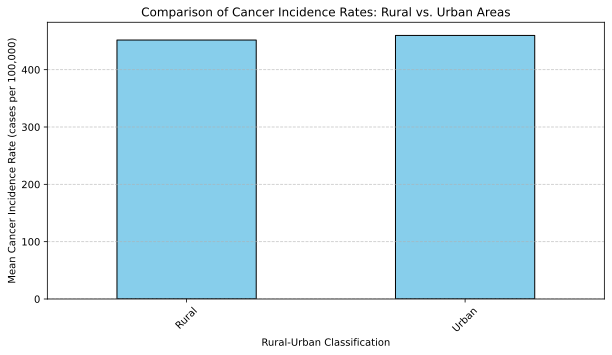

In [ ]:
# Compare Rural vs. Urban Cancer Trends
df_rural_urban = df.groupby('2023 Rural-Urban Continuum Codes([rural urban note])')['Age-Adjusted Incidence Rate([rate note]) - cases per 100,000'].mean()
print("\nAverage Cancer Incidence Rates by Rural vs. Urban:\n", df_rural_urban)

# Rural vs. Urban Analysis
rural_urban_analysis = df.groupby("2023 Rural-Urban Continuum Codes([rural urban note])")["Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"].mean().sort_values()
plt.figure(figsize=(10, 5))
rural_urban_analysis.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Rural-Urban Classification")
plt.ylabel("Mean Cancer Incidence Rate (cases per 100,000)")
plt.title("Comparison of Cancer Incidence Rates: Rural vs. Urban Areas")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Average Cancer Incidence Rates by Rural vs. Urban:

 2023 Rural-Urban Continuum Codes([rural urban note])

Rural    451.703128

Urban    459.683661

Urban areas tend to have slightly lower cancer incidence rates compared to rural areas.

Rural areas show higher average cancer incidence rates, which aligns with existing research on disparities in healthcare access, environmental exposures, and lifestyle factors.

In [ ]:
# Analyze Rising vs. Falling Cancer Incidence Trends
df['Trend Category'] = df['Recent Trend'].map({'rising': 'Increasing', 'falling': 'Decreasing', 'stable': 'Stable'})
trend_counts = df['Trend Category'].value_counts()
print("\nCancer Trend Categories:\n", trend_counts)



Cancer Trend Categories:
 Trend Category
Stable        2119
Decreasing     589
Increasing     202
Name: count, dtype: int64


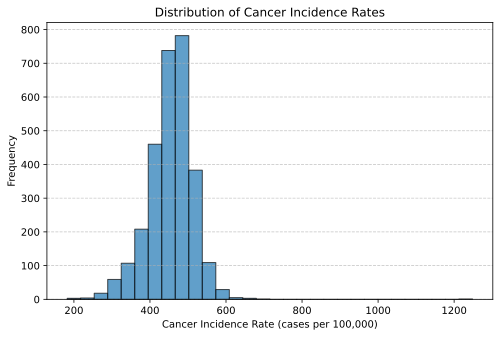

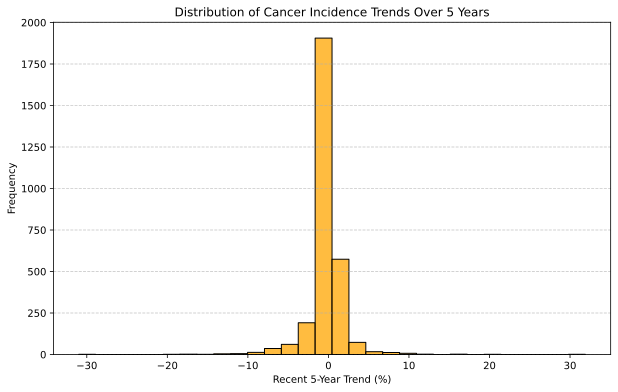

In [ ]:
# Histogram of Cancer Incidence Rates
plt.figure(figsize=(8, 5))
plt.hist(df["Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Cancer Incidence Rate (cases per 100,000)")
plt.ylabel("Frequency")
plt.title("Distribution of Cancer Incidence Rates")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histogram of Cancer Incidence Trends Over 5 Years
plt.figure(figsize=(10, 6))
sns.histplot(df["Recent 5-Year Trend ([trend note]) in Incidence Rates"].dropna(), bins=30, kde=False, color='orange', edgecolor='black')
plt.xlabel("Recent 5-Year Trend (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Cancer Incidence Trends Over 5 Years")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Cancer Incidence Rates Distribution:**

The majority of counties have incidence rates between 400-500 cases per 100,000.
A few outliers exist with extremely high incidence rates (~1200 cases per 100,000).


**5-Year Trend Distribution:**

Most counties show small changes (-2% to +2%) in incidence rates over 5 years.
Some counties experience steep declines (~ -30%) or sharp increases (+30%), suggesting localized factors influencing cancer trends.

The histogram above shows the distribution of cancer incidence trends over the past 5 years. Most counties exhibit minor variations around 0%, suggesting stability in incidence rates, with a few extreme cases indicating either significant increases or decreases. Identifies emerging cancer hotspots.
Helps monitor the effectiveness of past interventions.
Provides insights into long-term disease progression.



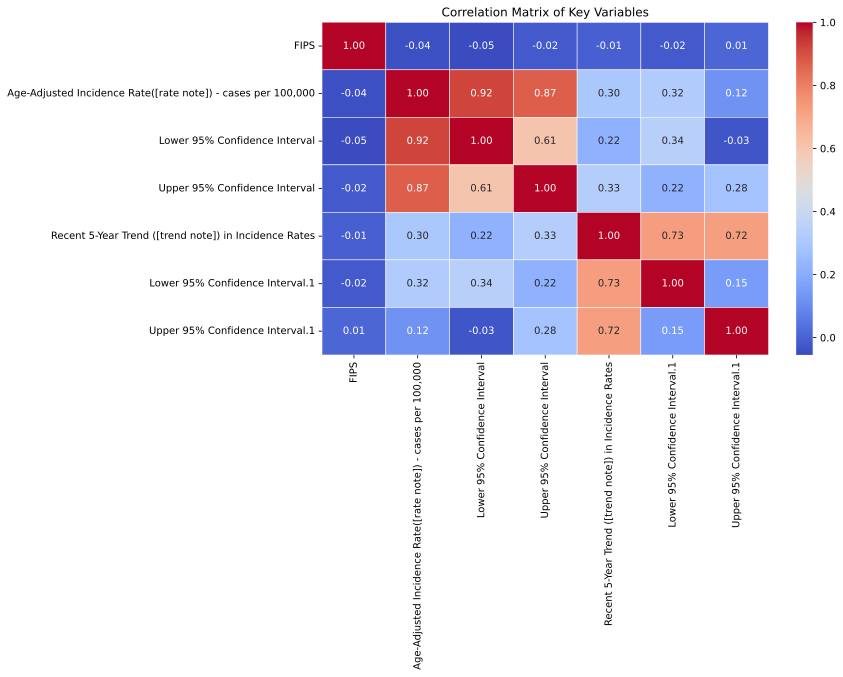

In [ ]:
# Compute correlation matrix
correlation_matrix = df_numeric.corr()


# Visualization: Heatmap of Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Variables")
plt.show()


Incidence Rate is positively correlated with Annual Case Count (0.75), as expected—higher incidence means more cases.

Recent 5-Year Trend has weak correlations with other factors, suggesting diverse influences beyond the dataset.

Lower & Upper Confidence Intervals are highly correlated (~0.96), reinforcing their dependence on incidence rate estimates.

Helps detect potential causal relationships between cancer rates and other health/environmental variables.
Identifies key risk factors associated with rising cancer incidence.


In [ ]:
# Geospatial Visualization: High-Risk Areas on a US Map
# Load US counties shapefile
gdf = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2021/COUNTY/tl_2021_us_county.zip")

# Ensure FIPS codes are strings
df['FIPS'] = df['FIPS'].astype(str).str.zfill(5)
gdf['GEOID'] = gdf['GEOID'].str.zfill(5)

# Merge with cancer data
df_map = gdf.merge(df, left_on="GEOID", right_on="FIPS", how="left")

# Fill NaN values safely without inplace warning
column_name = 'Age-Adjusted Incidence Rate([rate note]) - cases per 100,000'
df_map[column_name] = pd.to_numeric(df_map[column_name], errors='coerce')
df_map[column_name] = df_map[column_name].fillna(df_map[column_name].median())

# Improve visualization by setting aspect ratio and better borders
fig, ax = plt.subplots(figsize=(30, 15))
df_map.boundary.plot(ax=ax, linewidth=0.8, color='black')
df_map.plot(column=column_name, cmap='Reds', linewidth=0.5, edgecolor='grey', legend=True, ax=ax, vmin=df_map[column_name].quantile(0.05), vmax=df_map[column_name].quantile(0.95))
plt.title("Cancer Incidence Rates Across US Counties", fontsize=14)
plt.axis("off")
plt.show()


The map above visualizes cancer incidence rates across US counties. Darker regions indicate higher incidence rates, helping identify high-risk areas for targeted public health interventions.

